<a href="https://colab.research.google.com/github/Emma-Ok/Phishing-Detection-ML/blob/main/Exploring_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pishing For Machine Learning.

*Proyecto para la asignatura Modelos y Simulación 2.*
<br>

*Universidad de Antioquia*

In [6]:
# 1.1 Imports básicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para garantizar que las gráficas se muestren en Colab
%matplotlib inline

# 1.2 Carga de datos desde GitHub
url = "https://raw.githubusercontent.com/Emma-Ok/Phishing-Detection-ML/main/Phishing_Legitimate_full.csv"
df = pd.read_csv(url)
target = 'CLASS_LABEL'

# 1.3 Primer vistazo
print("Shape del dataset:", df.shape)
display(df.head())


Shape del dataset: (10000, 50)


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [15]:
# 2.1 Tipos de cada columna
print(df.dtypes)

# 2.2 Estadísticas descriptivas generales
display(df.describe().T)


# 2.3 Verificar valores faltantes
missing = df.isnull().sum()
print("Variables con valores faltantes:\n", missing[missing > 0])


id                                      int64
NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                    

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.0,2500.750000,5000.500000,7500.250000,10000.0
NumDots,10000.0,2.445100,1.346836,1.0,2.000000,2.000000,3.000000,21.0
SubdomainLevel,10000.0,0.586800,0.751214,0.0,0.000000,1.000000,1.000000,14.0
PathLevel,10000.0,3.300300,1.863241,0.0,2.000000,3.000000,4.000000,18.0
UrlLength,10000.0,70.264100,33.369877,12.0,48.000000,62.000000,84.000000,253.0
NumDash,10000.0,1.818000,3.106258,0.0,0.000000,0.000000,2.000000,55.0
NumDashInHostname,10000.0,0.138900,0.545744,0.0,0.000000,0.000000,0.000000,9.0
AtSymbol,10000.0,0.000300,0.017319,0.0,0.000000,0.000000,0.000000,1.0
TildeSymbol,10000.0,0.013100,0.113709,0.0,0.000000,0.000000,0.000000,1.0
NumUnderscore,10000.0,0.323200,1.114660,0.0,0.000000,0.000000,0.000000,18.0


Variables con valores faltantes:
 Series([], dtype: int64)


In [34]:
import pandas as pd

def inspect_and_convert_float_columns(df: pd.DataFrame):
    """
    1. Lista las columnas float del DataFrame.
    2. Muestra sus estadísticas descriptivas.
    3. Verifica qué porcentaje de valores en cada columna son enteros exactos.

    Parámetros
    ----------
    df : pd.DataFrame
        Tu DataFrame original.
    Retorna
    -------
    result : dict
        {
          'float_cols': List[str],
          'stats': pd.DataFrame,
          'integerity': Dict[col, pct_enteros],
        }
    """
    # 1. Identificar float columns
    float_cols = df.select_dtypes(include='float').columns.tolist()
    print(f"✎ Columnas float identificadas: {float_cols}\n")

    # 2. Estadísticas descriptivas
    stats = df[float_cols].describe().T
    display(stats)

    # 3. Chequear enteridad
    integerity = {}
    for col in float_cols:
        # fracciones iguales a cero
        pct_int = (df[col] % 1 == 0).mean() * 100
        integerity[col] = pct_int
        print(f"• {col}: {pct_int:.1f}% de valores son enteros exactos")
    print()
    return {
        'float_cols': float_cols,
        'stats': stats,
        'integerity': integerity,
    }



res = inspect_and_convert_float_columns(df)

# Si decides convertir las que sean 100% enteras:
# res = inspect_and_convert_float_columns(df, convert=True)


✎ Columnas float identificadas: ['PctExtHyperlinks', 'PctExtResourceUrls', 'PctNullSelfRedirectHyperlinks']



,count,mean,std,min,25%,50%,75%,max
PctExtHyperlinks,10000.0,0.241334,0.342370,0.0,0.000000,0.071429,0.315874,1.0
PctExtResourceUrls,10000.0,0.392932,0.387292,0.0,0.030303,0.247511,0.785714,1.0
PctNullSelfRedirectHyperlinks,10000.0,0.136136,0.312413,0.0,0.000000,0.000000,0.047619,1.0


• PctExtHyperlinks: 41.7% de valores son enteros exactos
• PctExtResourceUrls: 39.5% de valores son enteros exactos
• PctNullSelfRedirectHyperlinks: 66.6% de valores son enteros exactos



*PctExtHyperlink* --> Counts the percentage of external hyperlinks in the source code HTML

<br/>

*PctExtResourceUrls* --> Counts the percentage of external resource URLs in the
HTML source code.

<br/>

*PctNullSelfRedirectHyperlinks*: Count the percentage of hyperlink fields that contain empty value or an autoredirect value or an abnormal value.

Observamos que no hay datos faltantes.

In [23]:
import pandas as pd

def remove_constant_zero_columns(df: pd.DataFrame, target: str = None, verbose: bool = True):
    """
    Identifica columnas cuya única señal es 0 (min == max == 0),
    muestra información básica y las elimina del DataFrame.

    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame original con todas las columnas numéricas (y la columna target opcional).
    target : str, opcional
        Nombre de la columna objetivo que NO debe considerarse para eliminación.
    verbose : bool, default True
        Si es True, imprime el análisis de cada columna constante.

    Retorna
    -------
    df_clean : pd.DataFrame
        DataFrame sin las columnas constantes en 0.
    dropped_cols : List[str]
        Lista de columnas que fueron eliminadas.
    """
    # 1. Determinar columnas a revisar (excluimos target si se indica)
    cols = df.columns.drop(target) if target in df.columns else df.columns

    # 2. Filtrar columnas constantes en 0
    const_zero_cols = [col for col in cols if df[col].min() == 0 and df[col].max() == 0]

    # 3. Si verbose, mostrar análisis rápido
    if verbose and const_zero_cols:
        print(f"Columnas constantes en 0 ({len(const_zero_cols)}): {const_zero_cols}\n")
        for col in const_zero_cols:
            num_nulls = df[col].isnull().sum()
            pct_zeros = (df[col] == 0).mean() * 100
            print(f"- {col}: únicos = {df[col].unique()}, nulos = {num_nulls}, % ceros = {pct_zeros:.1f}%")
        print()
    elif verbose:
        print("No se encontraron columnas constantes en 0.")

    # 4. Eliminar esas columnas
    df_clean = df.drop(columns=const_zero_cols)

    return df_clean, const_zero_cols

# === Ejemplo de uso ===
# Supongamos que tu DataFrame se llama df y tu target 'Label'
df_limpio, columnas_eliminadas = remove_constant_zero_columns(df, target='Label')

print("Shape antes:", df.shape)
print("Shape después:", df_limpio.shape)


Columnas constantes en 0 (1): ['HttpsInHostname']

- HttpsInHostname: únicos = [0], nulos = 0, % ceros = 100.0%

Shape antes: (10000, 50)
Shape después: (10000, 49)


Observamos que no hay datos faltantes.

Recuento por clase:
 CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


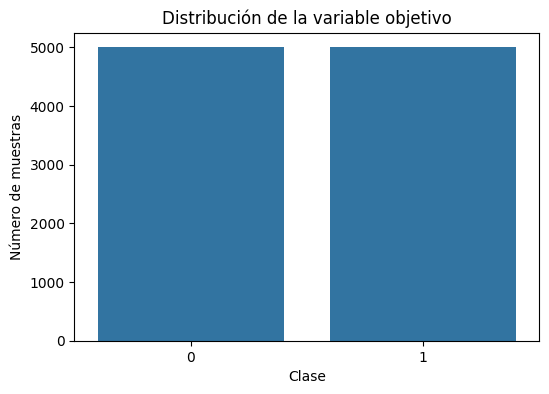

In [16]:
counts = df[target].value_counts()
print("Recuento por clase:\n", counts)

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values)
plt.title("Distribución de la variable objetivo")
plt.xlabel("Clase")
plt.ylabel("Número de muestras")
plt.show()


El dataset no está desbalanceado.

In [22]:
from sklearn.feature_selection import VarianceThreshold

# Umbral: eliminar features con varianza < 0.01
selector = VarianceThreshold(threshold=0.01)
selector.fit(df.drop(columns=[target]))  # excluimos la etiqueta

# Columnas que sobreviven
keep_cols = df.drop(columns=[target]).columns[selector.get_support()]
drop_lowvar = [
    col for col in df.drop(columns=[target]).columns
    if col not in keep_cols
]

print(f"Características de muy baja varianza ({len(drop_lowvar)}):", drop_lowvar)




Características de muy baja varianza (6): ['AtSymbol', 'NumHash', 'HttpsInHostname', 'DoubleSlashInPath', 'FakeLinkInStatusBar', 'PopUpWindow']


In [35]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Supongamos df es tu DataFrame y 'Label' la columna objetivo
X = df.drop(columns=['CLASS_LABEL'])

# 1. Creamos el selector con un umbral de varianza
threshold = 0.001
selector = VarianceThreshold(threshold=threshold)
selector.fit(X)

# 2. Columnas a conservar y a eliminar
keep_cols = X.columns[selector.get_support()]
drop_lowvar = [col for col in X.columns if col not in keep_cols]

print(f"Umbral de varianza: {threshold}")
print(f"Total de features: {X.shape[1]}")
print(f"Features con varianza < {threshold}: {len(drop_lowvar)}\n")
print("Lista de features de muy baja varianza:")
for col in drop_lowvar:
    var = X[col].var()
    print(f" • {col}: varianza = {var:.5f}")


Umbral de varianza: 0.001
Total de features: 49
Features con varianza < 0.001: 3

Lista de features de muy baja varianza:
 • AtSymbol: varianza = 0.00030
 • HttpsInHostname: varianza = 0.00000
 • DoubleSlashInPath: varianza = 0.00090


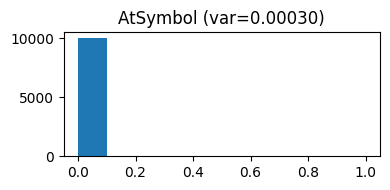

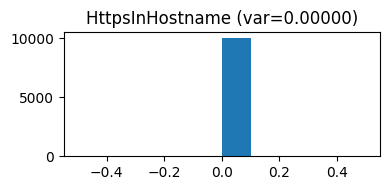

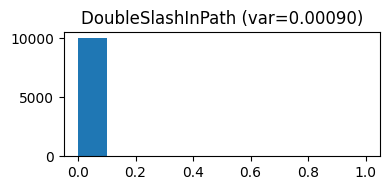

In [36]:
import matplotlib.pyplot as plt

# Selecciona hasta 4 features de baja varianza para graficar
to_plot = drop_lowvar[:4]

for col in to_plot:
    plt.figure(figsize=(4,2))
    plt.hist(X[col], bins=10)
    plt.title(f"{col} (var={X[col].var():.5f})")
    plt.tight_layout()
    plt.show()

Baja varianza → feature casi constante → poca o nula información para distinguir clases.

Recomendación → eliminar estas columnas antes de entrenar modelos (p. ej. con VarianceThreshold), y así mejorar eficiencia y reducir riesgo de sobreajuste.

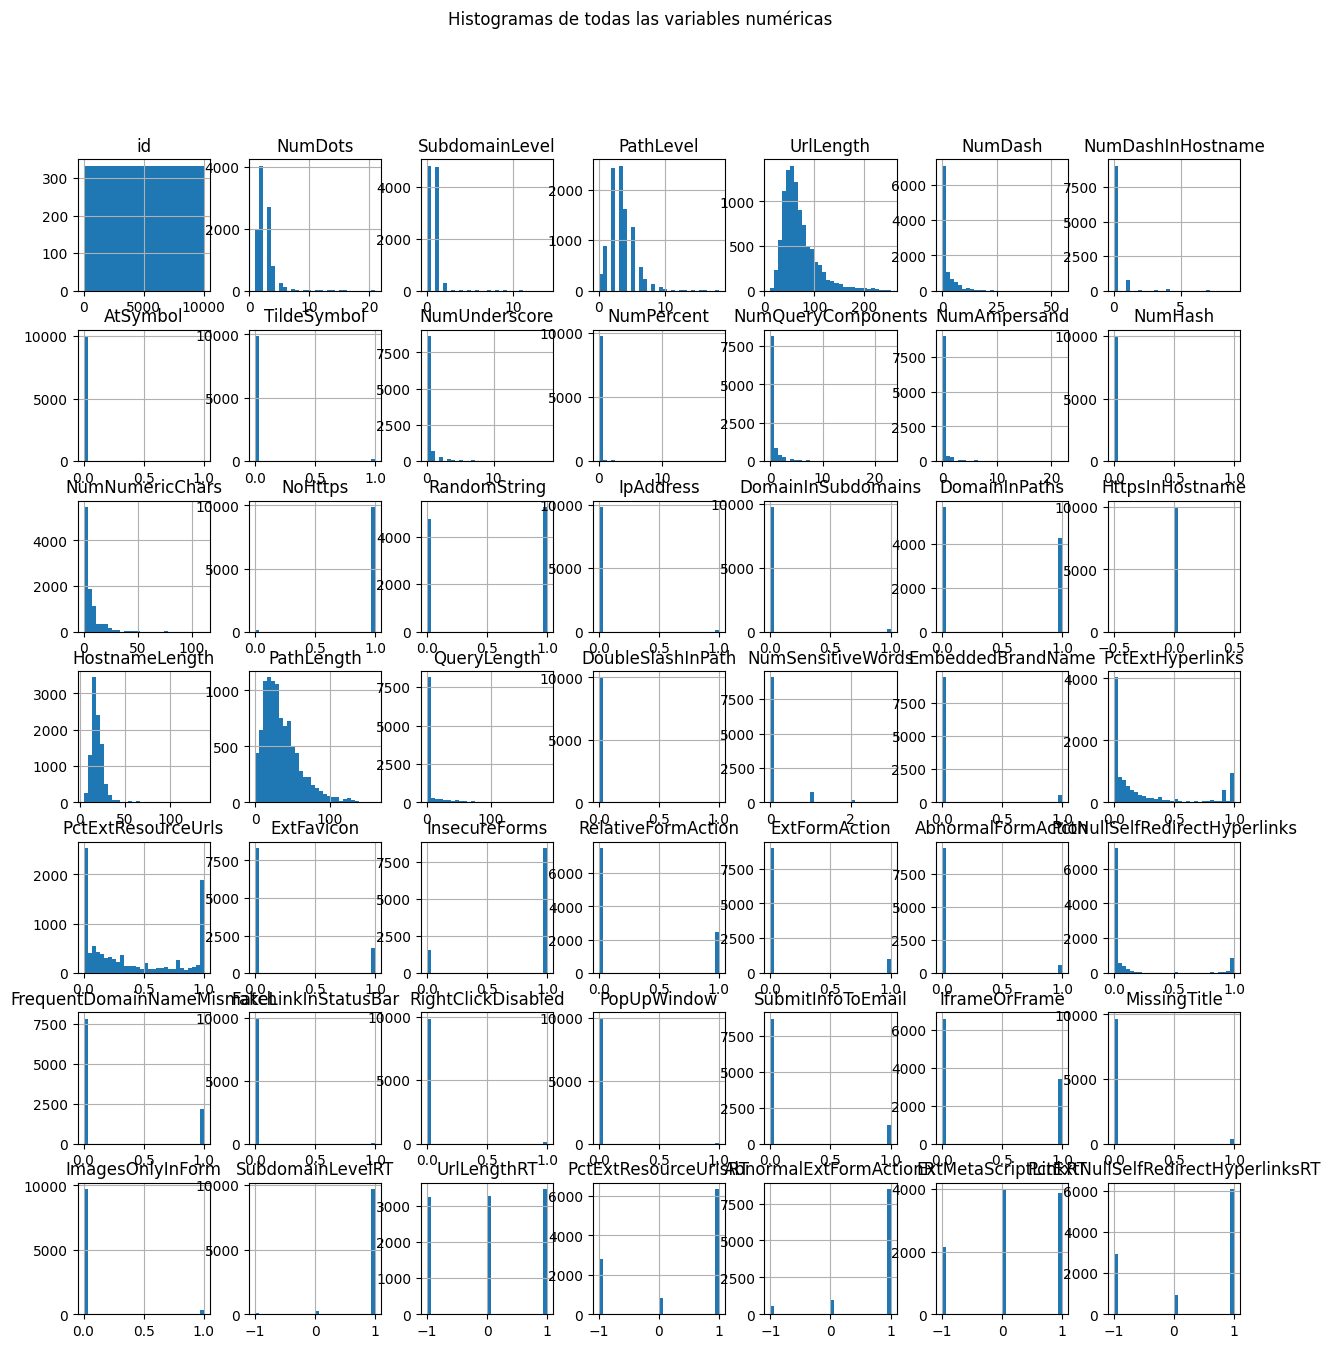

In [37]:
# 4.1 Histogramas de todas las features
df.drop(columns=[target]).hist(bins=30, figsize=(15,15))
plt.suptitle("Histogramas de todas las variables numéricas")
plt.show()

In [ ]:
# 4.2 Boxplots para detectar outliers
plt.figure(figsize=(15,10))
sns.boxplot(data=df.drop(columns=[target]), orient='h', palette="vlag")
plt.title("Boxplots univariados")
plt.show()

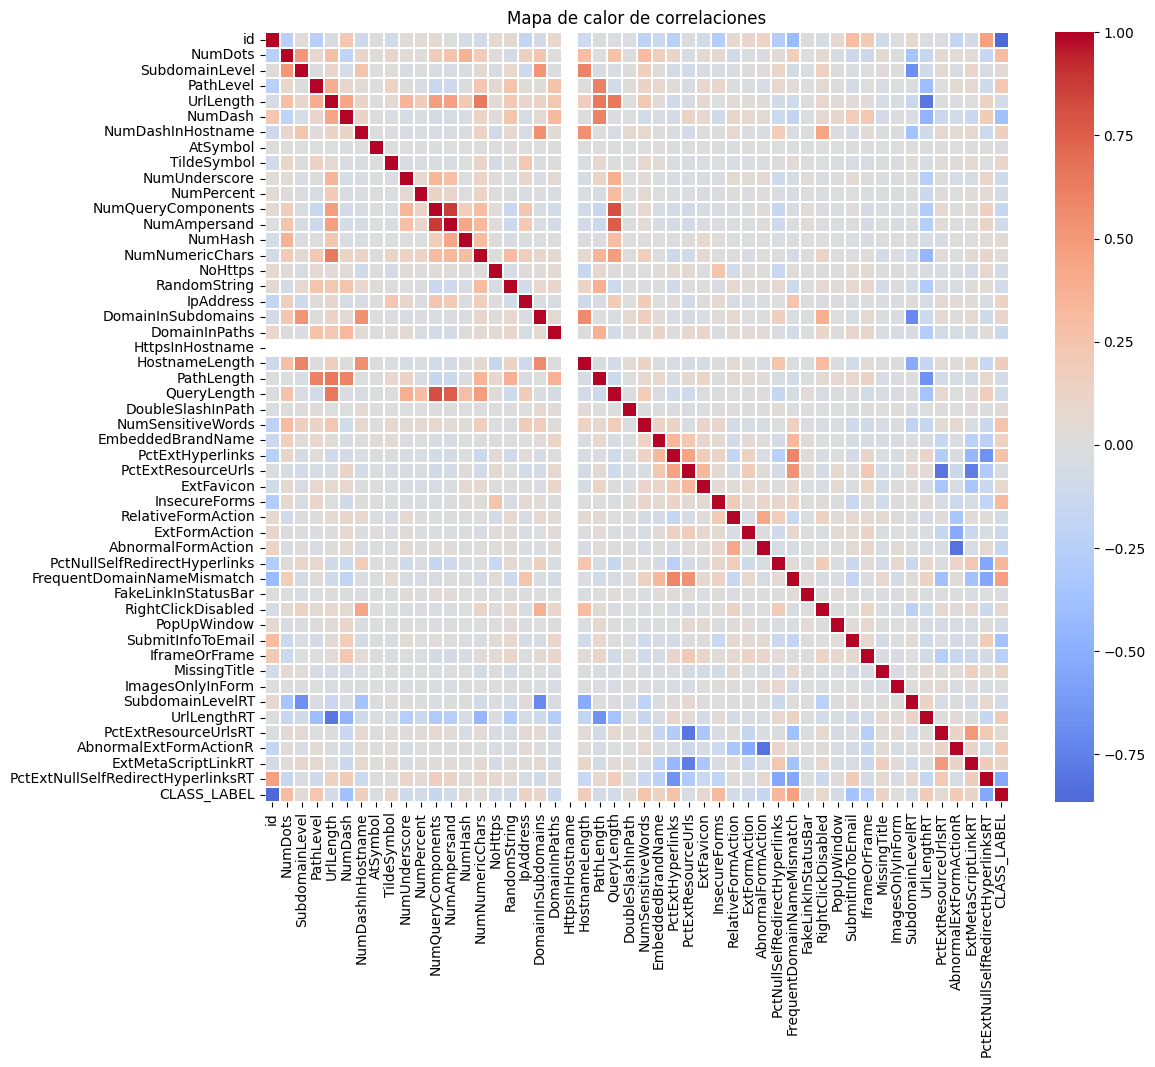

Pares con correlación |r| > 0.8:
 NumQueryComponents  NumAmpersand              0.872951
                    QueryLength               0.811784
UrlLength           UrlLengthRT              -0.800096
PctExtResourceUrls  PctExtResourceUrlsRT     -0.804744
AbnormalFormAction  AbnormalExtFormActionR   -0.818794
id                  CLASS_LABEL              -0.866025
dtype: float64


In [38]:
# 5.1 Cálculo de correlación
corr = df.corr()

# 5.2 Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.1)
plt.title("Mapa de calor de correlaciones")
plt.show()

# 5.3 Features altamente correlacionadas (>|0.8|)
high_corr = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        .stack()
        .sort_values(ascending=False)
)
print("Pares con correlación |r| > 0.8:\n", high_corr[abs(high_corr) > 0.8])


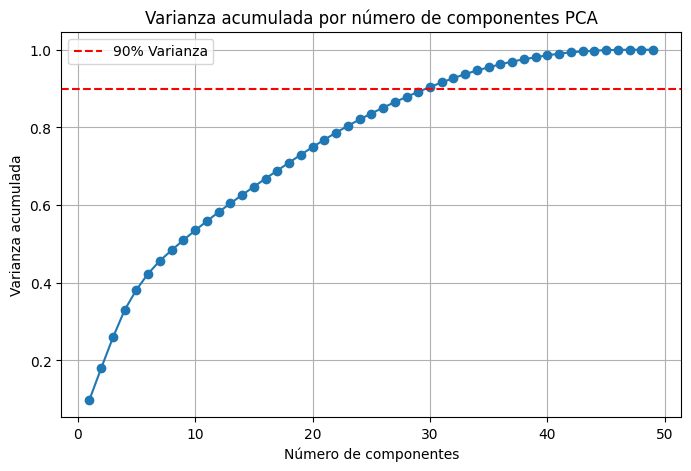

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 6.1 Estandarización
X = df.drop(columns=[target])
X_scaled = StandardScaler().fit_transform(X)

# 6.2 PCA para visualizar varianza acumulada
pca = PCA().fit(X_scaled)
var_exp = pca.explained_variance_ratio_
cum_var = np.cumsum(var_exp)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_exp)+1), cum_var, marker='o')
plt.axhline(0.9, color='r', linestyle='--', label='90% Varianza')
plt.title("Varianza acumulada por número de componentes PCA")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.legend()
plt.grid(True)
plt.show()


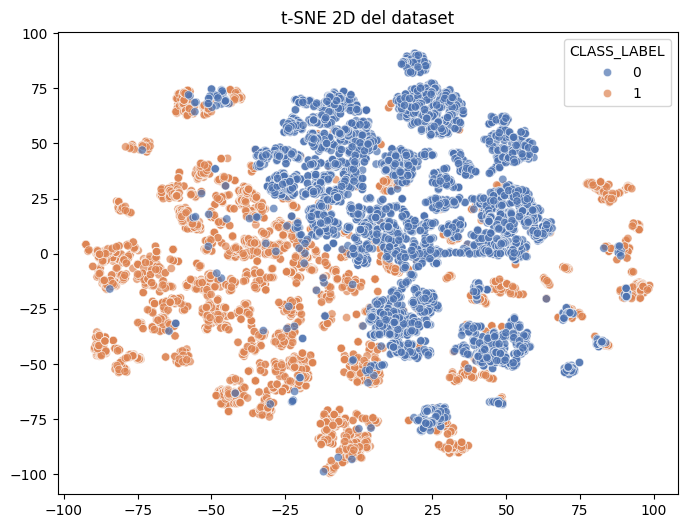

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X2d = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X2d[:,0], y=X2d[:,1], hue=df[target], palette="deep", alpha=0.7)
plt.title("t-SNE 2D del dataset")
plt.legend(title=target)
plt.show()
